# IT549 Deep Learning
### Assignment -3
### Dreamy Pujara - 202211005



# CIFAR10 dataset with ANN

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

In [ ]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train[0][0].shape

(32, 3)

In [ ]:
x_train[0][0][0].shape

(3,)

In [ ]:
x_train = x_train.reshape(50000,32,96)

In [ ]:
x_train.shape

(50000, 32, 96)

In [ ]:
x_train = x_train.reshape(50000,3072)

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_test = x_test.reshape(10000,32,96)

In [ ]:
x_test.shape

(10000, 32, 96)

In [ ]:
x_test = x_test.reshape(10000,3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
#ANN model on the CIFAR10 dataset.
def ANN(x_train,x_test,y_train):
  model = Sequential()
  model.add(Dense(20, input_shape=(3072,), activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=20, batch_size=10)
  predictions = (model.predict(x_test))
  return predictions

In [ ]:
#Predictions
predictions = ANN(x_train,x_test,y_train)

Epoch 1/20
5000/5000 [==============================] - 13s 3ms/step - loss: 2.3171 - accuracy: 0.0987
Epoch 2/20
5000/5000 [==============================] - 14s 3ms/step - loss: 2.3029 - accuracy: 0.0979
Epoch 3/20
5000/5000 [==============================] - 12s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Epoch 4/20
5000/5000 [==============================] - 14s 3ms/step - loss: 2.3029 - accuracy: 0.0977
Epoch 5/20
5000/5000 [==============================] - 11s 2ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 6/20
5000/5000 [==============================] - 13s 3ms/step - loss: 2.3029 - accuracy: 0.0963
Epoch 7/20
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3029 - accuracy: 0.0982
Epoch 8/20
5000/5000 [==============================] - 15s 3ms/step - loss: 2.3029 - accuracy: 0.0972
Epoch 9/20
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3029 - accuracy: 0.0983
Epoch 10/20
5000/5000 [==============================] - 16s 3ms/step - l

In [ ]:
predictions = np.argwhere(predictions==np.amax(predictions,1, keepdims=True))
predictions = np.array(predictions)
predictions = predictions.T
predictions = predictions[1]

In [ ]:
predictions

array([5, 5, 5, ..., 5, 5, 5])

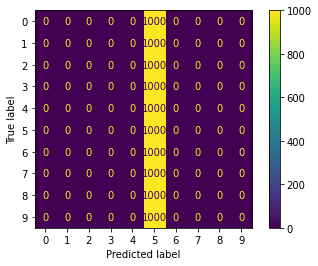

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show() 

In [ ]:
#accuracy
accuracy = metrics.accuracy_score(y_test, predictions)

In [ ]:
accuracy

0.1

In [ ]:
#precision
precision = metrics.precision_score(y_test, predictions , average='micro')

In [ ]:
precision     

0.1

In [ ]:
#sensitivity
Sensitivity_recall = metrics.recall_score(y_test, predictions,average='micro')

In [ ]:
Sensitivity_recall

0.1

In [ ]:
#specificity
Specificity = metrics.recall_score(y_test, predictions, pos_label=0,average='micro')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
Specificity

0.1

In [ ]:
#F1_Score
F1_score = metrics.f1_score(y_test, predictions,average='micro')

In [ ]:
F1_score

0.10000000000000002

# Churn_modeling binary classification with ANN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/churn_modeling/Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Label ENcoding
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Geography']= label_encoder.fit_transform(df['Geography'])

In [ ]:
x = df.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
y = df.iloc[:,-1]

In [ ]:
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
#MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit(x)
x_after_min_max_scaler = x_after_min_max_scaler.transform(x)

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(x_after_min_max_scaler,y, test_size=0.05, random_state=0)

In [ ]:
#Binary Classification
def binary_classifier1(x_train,y_train):
  model = Sequential()
  model.add(Dense(13, input_shape=(12,), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=150, batch_size=10)
  predictions = (model.predict(x_test) > 0.5).astype(int)
  return predictions

In [ ]:
predictions = binary_classifier1(x_train,y_train)

Epoch 1/150
950/950 [==============================] - 2s 2ms/step - loss: 0.4941 - accuracy: 0.7952
Epoch 2/150
950/950 [==============================] - 1s 1ms/step - loss: 0.4615 - accuracy: 0.8000
Epoch 3/150
950/950 [==============================] - 1s 1ms/step - loss: 0.4447 - accuracy: 0.8077
Epoch 4/150
950/950 [==============================] - 1s 1ms/step - loss: 0.4306 - accuracy: 0.8157
Epoch 5/150
950/950 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8245
Epoch 6/150
950/950 [==============================] - 1s 1ms/step - loss: 0.3862 - accuracy: 0.8403
Epoch 7/150
950/950 [==============================] - 2s 2ms/step - loss: 0.3729 - accuracy: 0.8472
Epoch 8/150
950/950 [==============================] - 2s 2ms/step - loss: 0.3669 - accuracy: 0.8509
Epoch 9/150
950/950 [==============================] - 1s 1ms/step - loss: 0.3636 - accuracy: 0.8522
Epoch 10/150
950/950 [==============================] - 1s 1ms/step - loss: 0.3609 - accura

In [ ]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

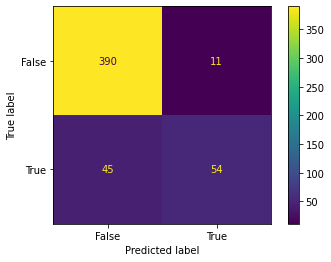

In [ ]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)

In [ ]:
accuracy

0.888

In [ ]:
precision = metrics.precision_score(y_test, predictions)

In [ ]:
precision

0.8307692307692308

In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, predictions)

In [ ]:
Sensitivity_recall

0.5454545454545454

In [ ]:
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)

In [ ]:
Specificity

0.972568578553616

In [ ]:
F1_score = metrics.f1_score(y_test, predictions)

In [ ]:
F1_score

0.6585365853658536

# house price prediction with Linear Regression

In [ ]:
df = pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('FireplaceQu', axis=1)

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])
df['Street']= label_encoder.fit_transform(df['MSZoning'])
df['LotShape']= label_encoder.fit_transform(df['LotShape'])
df['LandContour']= label_encoder.fit_transform(df['LandContour'])
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
df['LotConfig']= label_encoder.fit_transform(df['LotConfig'])
df['LandSlope']= label_encoder.fit_transform(df['LandSlope'])
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])
df['Condition1']= label_encoder.fit_transform(df['Condition1'])
df['Condition2']= label_encoder.fit_transform(df['Condition2'])
df['BldgType']= label_encoder.fit_transform(df['BldgType'])
df['HouseStyle']= label_encoder.fit_transform(df['HouseStyle'])
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['Exterior1st']= label_encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType']= label_encoder.fit_transform(df['MasVnrType'])
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])
df['Foundation']= label_encoder.fit_transform(df['Foundation'])
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])
df['BsmtCond']= label_encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure']= label_encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= label_encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']= label_encoder.fit_transform(df['BsmtFinType2'])
df['Heating']= label_encoder.fit_transform(df['Heating'])
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])
df['Electrical']= label_encoder.fit_transform(df['Electrical'])
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])
df['Functional']= label_encoder.fit_transform(df['Functional'])
df['GarageType']= label_encoder.fit_transform(df['GarageType'])
df['GarageFinish']= label_encoder.fit_transform(df['GarageFinish'])
df['GarageQual']= label_encoder.fit_transform(df['GarageQual'])
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,3,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,3,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,3,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,3,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,3,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,3,3,3,0,4,...,40,0,0,0,0,0,8,2007,8,4
1456,1457,20,3,85.0,13175,3,3,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1457,1458,70,3,66.0,9042,3,3,3,0,4,...,60,0,0,0,0,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,3,3,3,0,4,...,0,112,0,0,0,0,4,2010,8,4


In [ ]:
#MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit(x)
x_after_min_max_scaler = x_after_min_max_scaler.transform(x)

In [ ]:
#Linear Regression
linreg=LinearRegression()
linreg.fit(x_after_min_max_scaler,y)

LinearRegression()

In [ ]:
df2 = pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df2 = df2.drop('PoolQC', axis=1)
df2 = df2.drop('MiscFeature', axis=1)
df2 = df2.drop('Fence', axis=1)
df2 = df2.drop('Alley', axis=1)
df2 = df2.drop('FireplaceQu', axis=1)

In [ ]:
df2 = df2.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
df2['MSZoning']= label_encoder.fit_transform(df2['MSZoning'])
df2['Street']= label_encoder.fit_transform(df2['MSZoning'])
df2['LotShape']= label_encoder.fit_transform(df2['LotShape'])
df2['LandContour']= label_encoder.fit_transform(df2['LandContour'])
df2['Utilities']= label_encoder.fit_transform(df2['Utilities'])
df2['LotConfig']= label_encoder.fit_transform(df2['LotConfig'])
df2['LandSlope']= label_encoder.fit_transform(df2['LandSlope'])
df2['Neighborhood']= label_encoder.fit_transform(df2['Neighborhood'])
df2['Condition1']= label_encoder.fit_transform(df2['Condition1'])
df2['Condition2']= label_encoder.fit_transform(df2['Condition2'])
df2['BldgType']= label_encoder.fit_transform(df2['BldgType'])
df2['HouseStyle']= label_encoder.fit_transform(df2['HouseStyle'])
df2['RoofStyle']= label_encoder.fit_transform(df2['RoofStyle'])
df2['RoofMatl']= label_encoder.fit_transform(df2['RoofMatl'])
df2['Exterior1st']= label_encoder.fit_transform(df2['Exterior1st'])
df2['Exterior2nd']= label_encoder.fit_transform(df2['Exterior2nd'])
df2['MasVnrType']= label_encoder.fit_transform(df2['MasVnrType'])
df2['ExterQual']= label_encoder.fit_transform(df2['ExterQual'])
df2['ExterCond']= label_encoder.fit_transform(df2['ExterCond'])
df2['Foundation']= label_encoder.fit_transform(df2['Foundation'])
df2['BsmtQual']= label_encoder.fit_transform(df2['BsmtQual'])
df2['BsmtCond']= label_encoder.fit_transform(df2['BsmtCond'])
df2['BsmtExposure']= label_encoder.fit_transform(df2['BsmtExposure'])
df2['BsmtFinType1']= label_encoder.fit_transform(df2['BsmtFinType1'])
df2['BsmtFinType2']= label_encoder.fit_transform(df2['BsmtFinType2'])
df2['Heating']= label_encoder.fit_transform(df2['Heating'])
df2['HeatingQC']= label_encoder.fit_transform(df2['HeatingQC'])
df2['CentralAir']= label_encoder.fit_transform(df2['CentralAir'])
df2['Electrical']= label_encoder.fit_transform(df2['Electrical'])
df2['KitchenQual']= label_encoder.fit_transform(df2['KitchenQual'])
df2['Functional']= label_encoder.fit_transform(df2['Functional'])
df2['GarageType']= label_encoder.fit_transform(df2['GarageType'])
df2['GarageFinish']= label_encoder.fit_transform(df2['GarageFinish'])
df2['GarageQual']= label_encoder.fit_transform(df2['GarageQual'])
df2['GarageCond']= label_encoder.fit_transform(df2['GarageCond'])
df2['PavedDrive']= label_encoder.fit_transform(df2['PavedDrive'])
df2['SaleType']= label_encoder.fit_transform(df2['SaleType'])
df2['SaleCondition']= label_encoder.fit_transform(df2['SaleCondition'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
y_pred=linreg.predict(df2)
y_pred.shape

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(1459,)

In [ ]:
y_actual = pd.read_csv("/content/house-prices-advanced-regression-techniques/sample_submission.csv")

In [ ]:
y_actual

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
y_actual = y_actual.drop('Id', axis=1)

In [ ]:
mae = mean_absolute_error(y_actual,y_pred)

In [ ]:
mae

9.606477270990396e+19

In [ ]:
mse = mean_squared_error(y_actual,y_pred)

In [ ]:
mse

1.1706219862046093e+40

In [ ]:
rmse = np.sqrt(mean_squared_error(y_actual,y_pred))

In [ ]:
rmse

1.0819528576627584e+20

In [ ]:
r2 = r2_score(y_actual,y_pred)

In [ ]:
r2

-4.293224364632078e+31

# heart dataset with ANN and Linear Regression

In [ ]:
heart = pd.read_csv("heart.csv")

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
x = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
unique, counts = np.unique(y, return_counts=True)

In [ ]:
unique

array([0, 1])

ANN

In [ ]:
def ANN(x_train,y_train):
  model = Sequential()
  model.add(Dense(13, input_shape=(13,), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=150, batch_size=10)
  predictions = (model.predict(x_test) > 0.5).astype(int)
  return predictions

In [ ]:
predictions = ANN(x_train,y_train)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.7536 - accuracy: 0.6736
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.6612
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6736
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6818
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6777
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6777
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7025
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6942
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7149
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6942
Epoch 11/

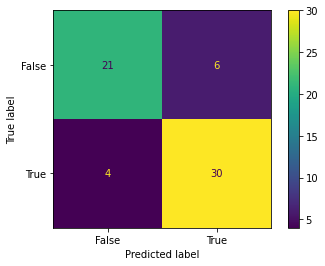

In [ ]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)

In [ ]:
accuracy

0.8360655737704918

In [ ]:
precision = metrics.precision_score(y_test, predictions)

In [ ]:
precision

0.8333333333333334

In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, predictions)

In [ ]:
Sensitivity_recall

0.8823529411764706

In [ ]:
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)

In [ ]:
Specificity

0.7777777777777778

In [ ]:
F1_score = metrics.f1_score(y_test, predictions)

In [ ]:
F1_score

0.8571428571428571

Linear Regression

In [ ]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

array([ 0.06801472,  0.71681997,  0.73679794,  0.01302379,  0.23606595,
        0.51943293,  0.1832927 ,  0.26862082, -0.18844421, -0.23819858,
        0.65236404,  0.89925409,  0.10829792,  0.76215218,  0.99402895,
        0.62248155,  0.17280607,  0.65143817, -0.14748662,  0.75662605,
        0.72253637,  0.4515309 ,  0.25067708,  0.24118341,  0.80149218,
        0.5818327 ,  0.3186585 ,  0.48354757,  1.06023388,  0.60702415,
        0.62134778, -0.05702169,  1.00480281,  0.65907569,  0.86560243,
        0.57494184,  0.07005343,  0.77550305,  0.18177813,  0.31589193,
        0.66827766,  0.73731671,  0.42602317,  0.18737756,  0.51958253,
        0.64602671,  0.75016333,  0.59514114,  0.13934865,  0.73662645,
        0.78272629,  0.56785086,  1.00228097,  0.77204668,  1.25304618,
        0.24734838,  0.93422182,  0.87746248,  0.69182111,  0.95483771,
        0.71801876])

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
mae

0.2981361736043103

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mse

0.1309909385704732

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
rmse

0.3619267033122497

In [ ]:
r2 = r2_score(y_test,y_pred)

In [ ]:
r2

0.4690443546615134